In [ ]:
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import datetime 
import tensorflow as tf  
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras import Sequential  
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.utils import to_categorical 
import sklearn

In [ ]:
trainX = np.load('image-classification-fashion-mnist/train.npy')
validationX = np.load('image-classification-fashion-mnist/validation.npy')
testX = np.load('image-classification-fashion-mnist/test.npy')
trainY = pd.read_csv('image-classification-fashion-mnist/train.csv')
validationY = pd.read_csv('image-classification-fashion-mnist/validation.csv')
testY = pd.read_csv('image-classification-fashion-mnist/sample_submission.csv')

In [ ]:
#reshape data
trainX =trainX.reshape(trainX.shape[0],28,28,1)
validationX = validationX.reshape(validationX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)
#normalization 
trainX = tf.keras.utils.normalize(trainX, axis=-1, order=2)
validationX = tf.keras.utils.normalize(validationX, axis=-1, order=2)
testX = tf.keras.utils.normalize(testX, axis=-1, order=2)
trainY=np.array(trainY['class'])
validationY =np.array(validationY['class'])
testY = np.array(testY['class'])
trainY = to_categorical (trainY)
validationY = to_categorical(validationY)
testY = to_categorical(testY)

In [ ]:
#Experiment 1-- Number of convolutional layers 
nets = 3 
model = [0]*nets 
for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,padding='same',activation='relu',
            input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    if j>0:
        model[j].add(Conv2D(48,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D())
    if j>1:
        model[j].add(Conv2D(64,kernel_size=5,padding='same',activation='relu'))
        model[j].add(MaxPool2D(padding='same'))
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='sigmoid'))
    model[j].compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
train_result = []
for i in range (3):
    train = model[i].fit(trainX, trainY,batch_size = 128, epochs = 20,
                 validation_data=(validationX,validationY))
    train_result.append(train)

In [ ]:
print(np.mean(train_result[0].history['accuracy']))
print(np.mean(train_result[1].history['accuracy']))
print(np.mean(train_result[2].history['accuracy']))

In [ ]:
#Experiment 2 
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
#     model[j].add(Conv2D(j*16+16,kernel_size=5,activation='relu'))
#     model[j].add(MaxPool2D())
    model[j].add(Flatten())
    model[j].add(Dense(256, activation='relu'))
    model[j].add(Dense(10, activation='sigmoid'))
    model[j].compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
train_result = []
for i in range (6):
    train = model[i].fit(trainX, trainY,batch_size = 128, epochs = 20,
                 validation_data=(validationX,validationY))
    train_result.append(train)

In [ ]:
print(np.mean(train_result[0].history['accuracy']))
print(np.mean(train_result[1].history['accuracy']))
print(np.mean(train_result[2].history['accuracy']))
print(np.mean(train_result[3].history['accuracy']))
print(np.mean(train_result[4].history['accuracy']))
print(np.mean(train_result[5].history['accuracy']))

In [ ]:
#Experiment 3 
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
#     model[j].add(Conv2D(48,kernel_size=5,activation='relu'))
#     model[j].add(MaxPool2D())
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(10, activation='sigmoid'))
    model[j].compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
train_result = []
for i in range (8):
    train = model[i].fit(trainX, trainY,batch_size = 128, epochs = 20,
                 validation_data=(validationX,validationY))
    train_result.append(train)

In [ ]:
print(np.mean(train_result[0].history['accuracy']))
print(np.mean(train_result[1].history['accuracy']))
print(np.mean(train_result[2].history['accuracy']))
print(np.mean(train_result[3].history['accuracy']))
print(np.mean(train_result[4].history['accuracy']))
print(np.mean(train_result[5].history['accuracy']))
print(np.mean(train_result[6].history['accuracy']))
print(np.mean(train_result[7].history['accuracy']))

In [ ]:
#Experiment4
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(24,kernel_size=5,activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPool2D())
    model[j].add(Dropout(j*0.1))
#     model[j].add(Conv2D(48,kernel_size=5,activation='relu'))
#     model[j].add(MaxPool2D())
#     model[j].add(Dropout(j*0.1))
    model[j].add(Flatten())
    model[j].add(Dense(512, activation='relu'))
    model[j].add(Dropout(j*0.1))
    model[j].add(Dense(10, activation='sigmoid'))
    model[j].compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
train_result = []
for i in range (8):
    train = model[i].fit(trainX, trainY,batch_size = 128, epochs = 20,
                 validation_data=(validationX,validationY))
    train_result.append(train)

In [ ]:
print(np.mean(train_result[0].history['accuracy']))
print(np.mean(train_result[1].history['accuracy']))
print(np.mean(train_result[2].history['accuracy']))
print(np.mean(train_result[3].history['accuracy']))
print(np.mean(train_result[4].history['accuracy']))
print(np.mean(train_result[5].history['accuracy']))
print(np.mean(train_result[6].history['accuracy']))
print(np.mean(train_result[7].history['accuracy']))


In [ ]:
model = Sequential()
model.add(Conv2D(24,kernel_size=5,activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(Dropout(0.2))
# model.add(Conv2D(48,kernel_size=5,activation='relu'))
# model.add(MaxPool2D())
# model.add(Dropout(0))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='sigmoid'))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
train = model.fit(trainX, trainY,batch_size = 128, epochs = 20,validation_data=(validationX,validationY))

Epoch 1/20
391/391 [==============================] - 31s 77ms/step - loss: 0.1407 - accuracy: 0.7235 - val_loss: 0.0700 - val_accuracy: 0.8569
Epoch 2/20
391/391 [==============================] - 28s 72ms/step - loss: 0.0701 - accuracy: 0.8577 - val_loss: 0.0601 - val_accuracy: 0.8775
Epoch 3/20
391/391 [==============================] - 28s 72ms/step - loss: 0.0619 - accuracy: 0.8729 - val_loss: 0.0567 - val_accuracy: 0.8835
Epoch 4/20
391/391 [==============================] - 28s 72ms/step - loss: 0.0559 - accuracy: 0.8861 - val_loss: 0.0544 - val_accuracy: 0.8896
Epoch 5/20
391/391 [==============================] - 29s 73ms/step - loss: 0.0518 - accuracy: 0.8951 - val_loss: 0.0527 - val_accuracy: 0.8920
Epoch 6/20
391/391 [==============================] - 29s 73ms/step - loss: 0.0491 - accuracy: 0.9018 - val_loss: 0.0542 - val_accuracy: 0.8890
Epoch 7/20
391/391 [==============================] - 29s 75ms/step - loss: 0.0469 - accuracy: 0.9068 - val_loss: 0.0532 - val_accuracy:

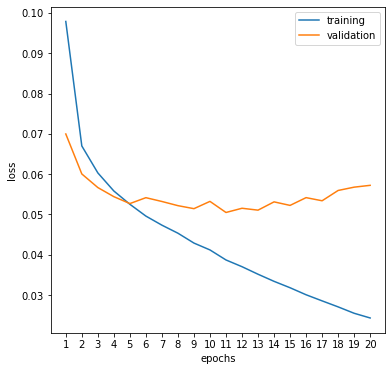

In [ ]:
x =train.history['loss']
y = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure(figsize=(6, 6))
plt.xticks(y)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(y,x,label='training')
x= train.history['val_loss']
plt.plot(y,x,label='validation')
plt.legend()
plt.show()

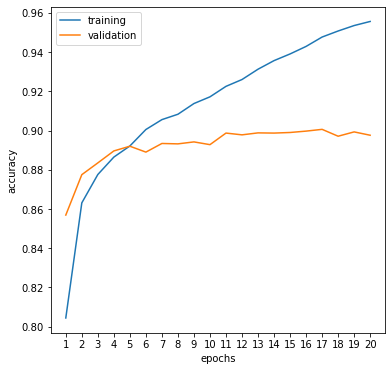

In [ ]:
x =train.history['accuracy']
y = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.figure(figsize=(6, 6))
plt.xticks(y)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(y,x,label='training')
x= train.history['val_accuracy']
plt.plot(y,x,label='validation')
plt.legend()
plt.show()

In [ ]:
model.evaluate(trainX, trainY, batch_size=128)
model.evaluate(validationX,validationY,batch_size=128)
# model.evaluate(testX,testY,batch_size=128)

79/79 [==============================] - 1s 16ms/step - loss: 0.0532 - accuracy: 0.8921


[0.05322911962866783, 0.8920999765396118]

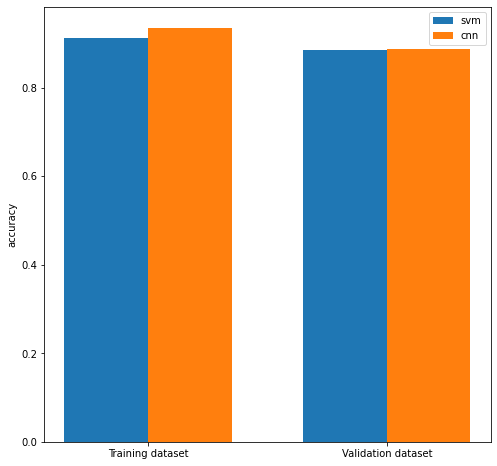

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
n = 2
ind = np.arange(n)
width = 0.35
x = ['Training dataset', 'Validation dataset']
svm = [0.9121,0.8859]
cnn = [0.9353,0.88693]
# plt.figure(figsize=[15, 10])
plt.figure(figsize=[8, 8])
plt.bar(ind,svm,width = 0.35)
plt.bar(ind+width,cnn, width = 0.35)
plt.legend(['svm','cnn'])
plt.xticks([i+0.175 for i in range(2)], x)
plt.ylabel('accuracy')
plt.show()